# Data Cleaning 

The data that we have is with impurities and before we proceed to start analyzing it or predicting anything we will clean the data. The excel file is divided into 3 main tables:

1. Transactions data
2. Customer demographics data
3. Customer Address data

Here we we clean Transaction table and do some Data preprocessing to make it reliable 

In [2]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
cwd = os.getcwd()
df = pd.read_excel(cwd+"/KPMG_VI_New_raw_data_update_final.xlsx",'Transactions', header=1)

In [4]:
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [5]:
df.shape

(20000, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [7]:
df.duplicated().value_counts()

False    20000
dtype: int64

In [8]:
df.transaction_date.dt.year.value_counts()

2017    20000
Name: transaction_date, dtype: int64

In [9]:
df.order_status.value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

# Finding the missing values

In [10]:
df.online_order.value_counts()

1.0    9829
0.0    9811
Name: online_order, dtype: int64

In [11]:
df[(df.online_order != 1.0 ) & (df.online_order != 0.0)]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
97,98,49,333,2017-06-23,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,37823.0
166,167,90,3177,2017-04-26,NaN,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,38482.0
169,170,6,404,2017-10-16,NaN,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,37838.0
250,251,63,1967,2017-04-11,NaN,Approved,Solex,Standard,medium,medium,1483.20,99.59,42145.0
300,301,78,2530,2017-03-24,NaN,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,35455.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19514,19515,51,690,2017-01-22,NaN,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19573,19574,18,1735,2017-01-15,NaN,Approved,Solex,Standard,medium,medium,575.27,431.45,41345.0
19580,19581,49,1933,2017-10-12,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,41064.0
19635,19636,98,1389,2017-07-26,NaN,Approved,Trek Bicycles,Standard,high,medium,358.39,215.03,38002.0


All this online order has a missing values . These missing values could also mean other modes of ordering or might even be the exchange orders. Let us just provide another floating value of 2.0 to the missing values indicating other modes of ordering.

In [14]:
df.online_order = df.online_order.fillna(2.0)

In [15]:
df.online_order.value_counts()

1.0    9829
0.0    9811
2.0     360
Name: online_order, dtype: int64

## Misssing Values in other rows 

Brand, product line, product class, product size, standard cost and product first sold date all have missing values 

In [16]:
df[df.brand.isna()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
136,137,0,431,2017-09-23,0.0,Approved,NaN,NaN,NaN,NaN,1942.61,NaN,NaN
159,160,0,3300,2017-08-27,0.0,Approved,NaN,NaN,NaN,NaN,1656.86,NaN,NaN
366,367,0,1614,2017-03-10,0.0,Approved,NaN,NaN,NaN,NaN,850.89,NaN,NaN
406,407,0,2559,2017-06-14,1.0,Approved,NaN,NaN,NaN,NaN,710.59,NaN,NaN
676,677,0,2609,2017-07-02,0.0,Approved,NaN,NaN,NaN,NaN,1972.01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19340,19341,0,443,2017-12-26,1.0,Approved,NaN,NaN,NaN,NaN,744.54,NaN,NaN
19383,19384,0,2407,2017-06-11,0.0,Approved,NaN,NaN,NaN,NaN,1098.18,NaN,NaN
19793,19794,0,2860,2017-01-13,0.0,Approved,NaN,NaN,NaN,NaN,868.56,NaN,NaN
19859,19860,0,2468,2017-06-24,1.0,Approved,NaN,NaN,NaN,NaN,1497.43,NaN,NaN


In [17]:
df.product_line.value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [18]:
df.product_class.value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [19]:
df.product_size.value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

In [20]:
df.standard_cost.value_counts()

388.920000    465
954.820000    396
53.620000     274
161.600000    235
260.140000    233
             ... 
151.960000    124
206.350000    114
312.735016      1
270.299988      1
667.400024      1
Name: standard_cost, Length: 103, dtype: int64

In [22]:
#We will fill the missing valueses from the mean

In [24]:
df.standard_cost = df.standard_cost.fillna(df.standard_cost.mean())

In [25]:
# there are 197 entries that is missing in the data . In this type of Situation either we can remove the values or 
# we can give me , median as per the data structure . If the data is more than 5% then we usually give mean or median , 
# but if the data is less than 5% we renove it 

# Histogram 

<Axes: xlabel='list_price', ylabel='Density'>

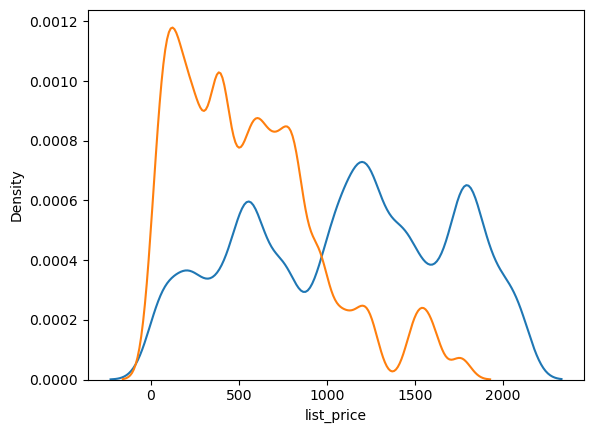

In [29]:
ax = sns.kdeplot(data=df, x="list_price")
sns.kdeplot(data=df, x="standard_cost", ax=ax)


standard cost histogram suggests there are outliers and the curve is right skewed.

In [30]:
# mean and meadian of standard cost
df.standard_cost.median(), df.standard_cost.mean()

(507.58, 556.0469512209311)

In [33]:
df.to_excel(cwd + "/Transcation.xlsx", "Transactions")